<a href="https://colab.research.google.com/github/aishwamurali/aishwamurali/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>Author: Aishwarya Muralidharan Nair
<br>CWID: 20015437
<br>AAI 627 HW5
<br>Date: 10/05/2022
<br>Dataset: https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset#

The dataset conatins data pertaining to two types of raisins and their features.

Attribute Information:
1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins. 
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

Applying SVM to classify the raisins into Kecimen or Besni class based on given attributes.

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Importing data from drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/Raisin_Dataset.csv")

Mounted at /content/drive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
data['Class'].describe()

count         900
unique          2
top       Kecimen
freq          450
Name: Class, dtype: object

In [6]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [7]:
data1 = data[data.Class=="Besni"]
data2 = data[data.Class=="Kecimen"]

Visualizing the target with respect to different features
1.   Major Axis Length vs Minor Axis Length

Text(0, 0.5, 'MinorAxisLength')

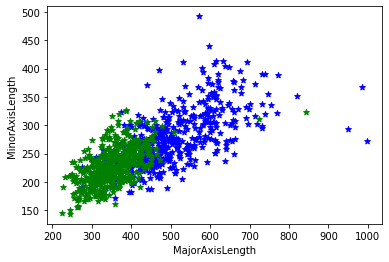

In [8]:
plt.scatter(data1["MajorAxisLength"],data1["MinorAxisLength"],color = "blue", marker = "*")
plt.scatter(data2["MajorAxisLength"],data2["MinorAxisLength"],color = "green", marker = "*")
plt.xlabel("MajorAxisLength")
plt.ylabel("MinorAxisLength")

2.   Area vs Perimeter

Text(0, 0.5, 'Perimeter')

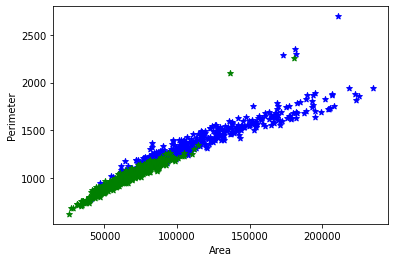

In [9]:
plt.scatter(data1["Area"],data1["Perimeter"],color = "blue", marker = "*")
plt.scatter(data2["Area"],data2["Perimeter"],color = "green", marker = "*")
plt.xlabel("Area")
plt.ylabel("Perimeter")

3.   Area vs Convex Area

Text(0, 0.5, 'ConvexArea')

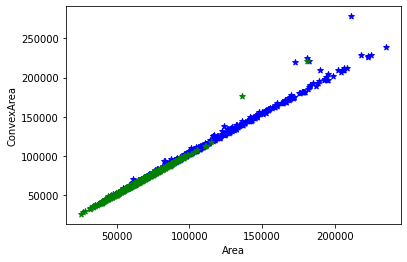

In [10]:
plt.scatter(data1["Area"],data1["ConvexArea"],color = "blue", marker = "*")
plt.scatter(data2["Area"],data2["ConvexArea"],color = "green", marker = "*")
plt.xlabel("Area")
plt.ylabel("ConvexArea")

4.   Eccentricity vs Extent

Text(0, 0.5, 'Extent')

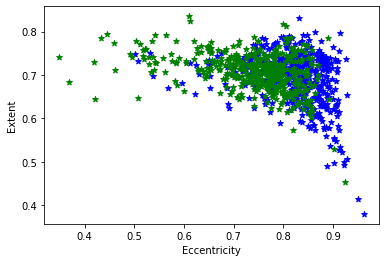

In [11]:
plt.scatter(data1["Eccentricity"],data1["Extent"],color = "blue", marker = "*")
plt.scatter(data2["Eccentricity"],data2["Extent"],color = "green", marker = "*")
plt.xlabel("Eccentricity")
plt.ylabel("Extent")

Splitting dataset into training set, target set and testing set

In [12]:
X = data.iloc[:,0:7]
Y = data.iloc[:,7]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.3)

Scaling the data set using StandardScaler function from sklearn

In [13]:
scaled_X = StandardScaler()
X_train = scaled_X.fit_transform(X_train)
X_test = scaled_X.transform(X_test)

In [14]:
print('Length of X_train is: \n', len(X_train))
print('Length of X_test is: \n', len(X_test))
print('Length of Y_train is: \n', len(Y_train))
print('Length of Y_test is: \n', len(Y_test))

Length of X_train is: 
 630
Length of X_test is: 
 270
Length of Y_train is: 
 630
Length of Y_test is: 
 270


In [15]:
svmodel = SVC(C=1, gamma = 0.05, kernel = "rbf")

In [16]:
svmodel.fit(X_train, Y_train)

SVC(C=1, gamma=0.05)

Predicting the target value with the testing data

In [17]:
Y_predict = svmodel.predict(X_test)
len(Y_predict)

270

Confusion Matrix

In [18]:
conf_mat = confusion_matrix(Y_test, Y_predict)
print(conf_mat)

[[107  19]
 [ 10 134]]


f1 score for each of the varieities

In [19]:
f1_score(Y_test, Y_predict, pos_label="Besni")

0.8806584362139918

In [20]:
f1_score(Y_test, Y_predict, pos_label="Kecimen")

0.9023569023569024

Accuracy of the SVM model

In [21]:
print(accuracy_score(Y_test, Y_predict))

0.8925925925925926


In [22]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

       Besni       0.91      0.85      0.88       126
     Kecimen       0.88      0.93      0.90       144

    accuracy                           0.89       270
   macro avg       0.90      0.89      0.89       270
weighted avg       0.89      0.89      0.89       270



Resulting model shows an accuracy of 89%